In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Define Model

In [2]:
class Model(object):
  def __init__(self):
    # Initialize the weight and bias to be 2.0 and 1.0 respectively
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

### 2. Define Loss Fucntion
We would use mean squared error loss

In [3]:
def loss(y_true, y_pred):
  loss = tf.reduce_mean(tf.square(y_true - y_pred))
  return loss

### 3. Obtain Training Data

In [4]:
TRUE_w = 3.0
TRUE_b = 2.0

NUM_EXAMPLES = 1000
x_samples = tf.random.normal(shape=[NUM_EXAMPLES])
y_samples = x_samples * TRUE_w + TRUE_b

#### 3.1. Visualzing Training Data Values & Predicted Values

In [5]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b')
  predicted = plt.scatter(inputs, predicted_outputs, c='r')
  plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
  plt.show()

In [6]:
model = Model()

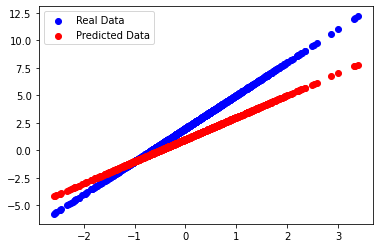

Current Loss: 2.170412


In [7]:
plot_data(x_samples, y_samples, model(x_samples))
print('Current Loss: %1.6f' % loss(y_samples, model(x_samples)).numpy())

### 4. Define Training Loop

In [8]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss(outputs, model(inputs))
  dw, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

#### 4.1. Perform Training For A Number Of Epochs

In [9]:
list_w, list_b = [], []
losses = []
epochs = range(15)

model = Model()

for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_samples, y_samples, 0.1)
  losses.append(current_loss)
  print('Epoch %2d, w=%1.2f, b=%1.2f, loss=%2.5f' % 
        (epoch, model.w, model.b, current_loss))

Epoch  0, w=2.22, b=1.22, loss=2.17041
Epoch  1, w=2.38, b=1.39, loss=1.33046
Epoch  2, w=2.52, b=1.52, loss=0.81559
Epoch  3, w=2.62, b=1.63, loss=0.49998
Epoch  4, w=2.70, b=1.71, loss=0.30651
Epoch  5, w=2.77, b=1.77, loss=0.18791
Epoch  6, w=2.82, b=1.82, loss=0.11520
Epoch  7, w=2.86, b=1.86, loss=0.07063
Epoch  8, w=2.89, b=1.89, loss=0.04331
Epoch  9, w=2.91, b=1.92, loss=0.02655
Epoch 10, w=2.93, b=1.93, loss=0.01628
Epoch 11, w=2.94, b=1.95, loss=0.00998
Epoch 12, w=2.96, b=1.96, loss=0.00612
Epoch 13, w=2.97, b=1.97, loss=0.00375
Epoch 14, w=2.97, b=1.98, loss=0.00230


#### 4.2. Plot The Loss & Progression of Trainable Variables Over Epochs

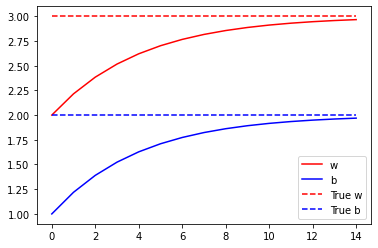

In [10]:
plt.plot(epochs, list_w, 'r',
         epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

### 5. Plots For Evaluation
Plot actual outputs in RED and predicted outputs in BLUE on a set of random test examples.

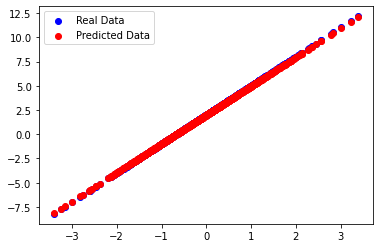

In [12]:
test_inputs = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

#### 5.1. Plot Loss Function Against Each Of The Trainable Weights The Model Approximated

In [13]:
def plot_loss_against_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')

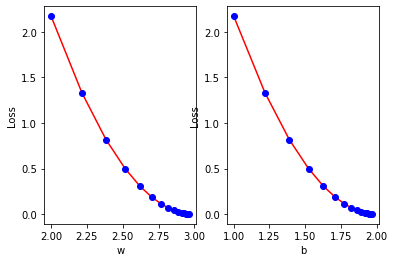

In [14]:
weights_list = [
                {
                    'name': 'w',
                    'values': list_w
                },
                {
                    'name': 'b',
                    'values': list_b
                }
]

plot_loss_against_weights(weights_list, losses)